In [ ]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Matplotlib: Exploring <br> <br> <br>Data Visualization</p><br><br>

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This week, we will be using an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

# Step 1: Initial exploration of the Dataset

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Indicators.csv')
data.shape

(5656458, 6)

This is a really large dataset, at least in terms of the number of rows.  But with 6 columns, what does this hold?

In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


Looks like it has different indicators for different countries with the year and value of the indicator. 

In [70]:
uniqueIndicator = data['IndicatorName'].unique()
uniqueIndpd = pd.DataFrame(uniqueIndicator)

In [74]:
uniqueIndpd[1000:]

,0
1000,"Unemployment, youth female (% of female labor ..."
1001,"Unemployment, youth male (% of male labor forc..."
1002,"Unemployment, youth total (% of total labor fo..."
1003,Pump price for diesel fuel (US$ per liter)
1004,Pump price for gasoline (US$ per liter)
1005,Investment in water and sanitation with privat...
1006,Depth of the food deficit (kilocalories per pe...
1007,Merchandise exports to developing economies in...
1008,Merchandise imports from developing economies ...
1009,"Net bilateral aid flows from DAC donors, Icela..."


### How many UNIQUE country names are there ?

In [10]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

### Are there same number of country codes ?

In [11]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

### Are there many indicators or few ?

In [14]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [15]:
# How many unique indicators cide are there ? (should be the same #)
indicatorsCode = data['IndicatorCode'].unique().tolist()
len(indicatorsCode)

1344

### How many years of data do we have ?

In [16]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

### What's the range of years?

In [17]:
print(min(years)," to ",max(years))

1960  to  2015


<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 1</p><br>

### Lets pick a country and an indicator to explore: CO2 Emissions per capita and the USA

In [24]:
# select CO2 emissions for the United States
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'BRA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage = data[mask1 & mask2]

In [25]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5642,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.647068
29722,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.658625
56759,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.697281
85147,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.700749
113859,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.694001


### Let's see how emissions have changed over time using MatplotLib

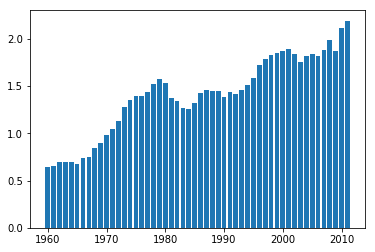

In [26]:
# get the years
years = stage['Year'].values
# get the values 
co2 = stage['Value'].values

# create
plt.bar(years,co2)
plt.show()

Turns out emissions per capita have dropped a bit over time, but let's make this graphic a bit more appealing before we continue to explore it.

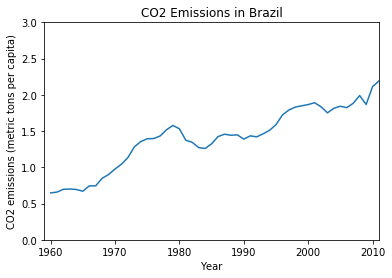

In [30]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('CO2 Emissions in Brazil')

# to make more honest, start they y axis at 0
plt.axis([1959, 2011,0,3])

plt.show()

### Using Histograms to explore the distribution of values
We could also visualize this data as a histogram to better explore the ranges of values in CO2 production per year. 

In [31]:
# If you want to just include those within one standard deviation fo the mean, you could do the following
# lower = stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper ]

# Otherwise, let's look at all the data
hist_data = stage['Value'].values

In [32]:
print(len(hist_data))

52


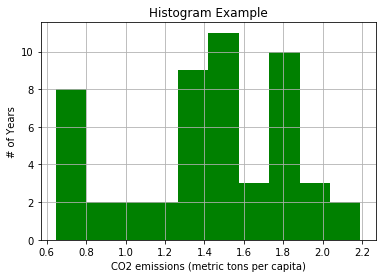

In [34]:
# the histogram of the data
plt.hist(hist_data, 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

So the USA has many years where it produced between 19-20 metric tons per capita with outliers on either side.

### But how do the USA's numbers relate to those of other countries?

In [35]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


For how many countries do we have CO2 per capita emissions data in 2011

In [36]:
print(len(co2_2011))

232


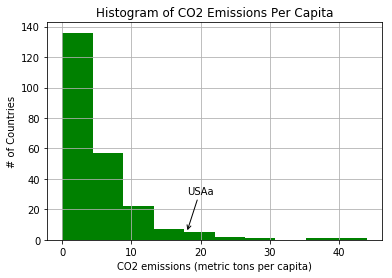

In [47]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USAa",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

So the USA, at ~18 CO2 emissions (metric tons per capital) is quite high among all countries.

An interesting next step, which we'll save for you, would be to explore how this relates to other industrialized nations and to look at the outliers with those values in the 40s!

<p style="font-family: Arial; font-size:2.0em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 2</p>

### Relationship between GPD and CO2 Emissions in USA

In [57]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'BRA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [58]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5679,Brazil,BRA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,1712.763497
29763,Brazil,BRA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,1832.808061


In [59]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5642,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.647068
29722,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.658625


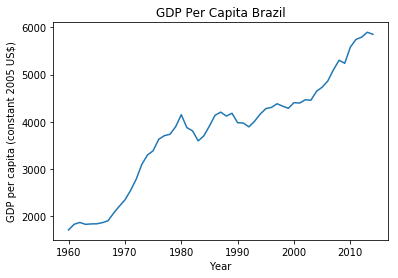

In [60]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita Brazil')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

So although we've seen a decline in the CO2 emissions per capita, it does not seem to translate to a decline in GDP per capita

### ScatterPlot for comparing GDP against CO2 emissions (per capita)

First, we'll need to make sure we're looking at the same time frames

In [61]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


We have 3 extra years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [62]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


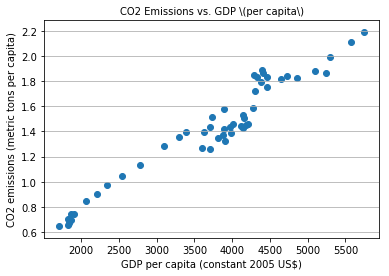

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

This doesn't look like a strong relationship.  We can test this by looking at correlation.

In [64]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.97136744],
       [0.97136744, 1.        ]])

A correlation of 0.07 is pretty weak, but you'll learn more about correlation in the next course.

You could continue to explore this to see if other countries have a closer relationship between CO2 emissions and GDP.  Perhaps it is stronger for developing countries?

## Want more ? 

### Matplotlib Examples Library

http://matplotlib.org/examples/index.html

In [65]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Children in employment

In [ ]:
#Children in employment, work only

In [80]:
# select Children in employment
hist_indicator_chil = 'Children in employment, work only'
#hist_country = 'BRA'

mask11 = data['IndicatorName'].str.contains(hist_indicator_chil) 
mask21 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
#stage2 = data[mask11 & mask21]
stage2 = data[mask11]
len(stage2)

511

In [79]:
stage2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
2416169,Guinea,GIN,"Children in employment, work only (% of childr...",SL.TLF.0714.WK.ZS,1994,98.6
2416170,Guinea,GIN,"Children in employment, work only, female (% o...",SL.TLF.0714.WK.FE.ZS,1994,99.0
2416171,Guinea,GIN,"Children in employment, work only, male (% of ...",SL.TLF.0714.WK.MA.ZS,1994,98.3
2692090,Kazakhstan,KAZ,"Children in employment, work only (% of childr...",SL.TLF.0714.WK.ZS,1996,4.4
2692091,Kazakhstan,KAZ,"Children in employment, work only, female (% o...",SL.TLF.0714.WK.FE.ZS,1996,2.1


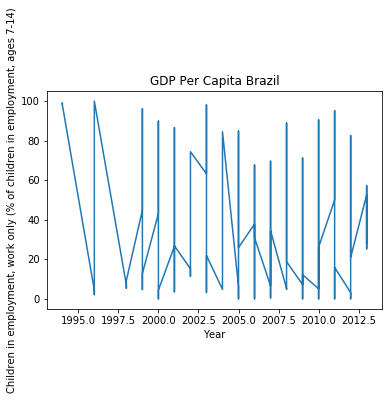

In [82]:
# switch to a line plot
plt.plot(stage2['Year'].values, stage2['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage2['IndicatorName'].iloc[0])

#label the figure
#plt.title('GDP Per Capita Brazil')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()